**Dataset:** /datasets/hw2-chicago.csv. "House Prices" is a list of homes sold in Chicago. "Neighborhood Information" contains broad demographic data for each neighborhood.



What is the price of 1342 N Leavitt Street? It's located in Wicker Park, a single-family home with two baths. The home is a 10-minute drive from the loop at 3.96 miles to Lake Michigan. The local crime index is 3.76 and the local school index is 16.7. The house is 116 years old. The lot size is 3,049 sqft and the house size is 3,154 sqft.


In [63]:
import numpy as np
import pandas as pd
import math

from matplotlib import pyplot as plt
%matplotlib inline

In [64]:
# Load in the data file here using Pandas!
HOUSE_DATA = "../datasets/hw2-chicago.csv"
raw_data = pd.read_csv(HOUSE_DATA)
print(raw_data.head())
#Note that Bath, Age, LotSizeSqft, and HouseSizeSqft all seem to have incomplete values

                              Address Neighborhood          HouseType   Price  \
0   2111 W Division St #5, Chicago IL  Wicker Park              Condo  390000   
1     1520 W Walton St #2, Chicago IL  Wicker Park              Condo  320500   
2        2047 W Thomas St, Chicago IL  Wicker Park  Multi-Family Home  620000   
3  1735 N Paulina St #314, Chicago IL  Wicker Park              Condo  318000   
4        1634 W Beach Ave, Chicago IL  Wicker Park  Multi-Family Home  477000   

   Bath  CrimeIndex  MinutesToLoop  MilesToLake  Age  LotSizeSqft  \
0   NaN        2.59              9         3.91    0            0   
1   NaN        4.10              7         3.02    0            0   
2     4        2.09              9         3.84   94         3049   
3   NaN        2.40              9         2.90    0            0   
4     2        4.63              9         2.96   31         2614   

   HouseSizeSqft  SchoolIndex  
0              0         36.2  
1              0         91.7  
2 

In [65]:
print(len(raw_data))
categories = list(raw_data.columns)
print(categories)

#Find out the data types in each column
print("-"*10)
for column in raw_data:
    print("The " + column + " variables have the following data type: ",np.dtype(raw_data[column]))

#Find out if any columns have null data, and if so, how many rows?
print("-"*10)
for column in raw_data:
    test = pd.isnull(raw_data[column])
    print("The number of null values in the " + column + " column is: ", len(raw_data[test]))

#Find out how many in the Bath, Age, LotSizeSqft, and HouseSizeSqft columns are 0
print("-"*10)
select_columns = ["Age", "LotSizeSqft","HouseSizeSqft"]
test_raw_data = raw_data[select_columns]

for column in test_raw_data:
    print("The " + column + " column has ", (test_raw_data[column] != 0).sum(), "non-zero values")



219
['Address', 'Neighborhood', 'HouseType', 'Price', 'Bath', 'CrimeIndex', 'MinutesToLoop', 'MilesToLake', 'Age', 'LotSizeSqft', 'HouseSizeSqft', 'SchoolIndex']
----------
The Address variables have the following data type:  object
The Neighborhood variables have the following data type:  object
The HouseType variables have the following data type:  object
The Price variables have the following data type:  int64
The Bath variables have the following data type:  float64
The CrimeIndex variables have the following data type:  float64
The MinutesToLoop variables have the following data type:  int64
The MilesToLake variables have the following data type:  float64
The Age variables have the following data type:  int64
The LotSizeSqft variables have the following data type:  int64
The HouseSizeSqft variables have the following data type:  int64
The SchoolIndex variables have the following data type:  float64
----------
The number of null values in the Address column is:  0
The number of nul

In [66]:
#I'll create a loop to find the unique values in each category. I could print each unique values but that takes a lot
#of space
for column in raw_data:
    print("The following is the number of unique values in the " + column + " column", len(raw_data[column].unique()))

#Next up I can find out if the rows in each numeric column all contain numbers
#Based on what was done in Part 2, we know that everything that is not a number type is an object type
print("-"*10)
for column in raw_data:
    if np.dtype(raw_data[column]) != "object":
        test = np.isnan(raw_data[column])
        print("The " + column + "column has ", len(raw_data[test]), "NaN values")
        
#Therefore we can see that the Bath column has many rows with NaN

The following is the number of unique values in the Address column 219
The following is the number of unique values in the Neighborhood column 1
The following is the number of unique values in the HouseType column 6
The following is the number of unique values in the Price column 170
The following is the number of unique values in the Bath column 5
The following is the number of unique values in the CrimeIndex column 63
The following is the number of unique values in the MinutesToLoop column 7
The following is the number of unique values in the MilesToLake column 97
The following is the number of unique values in the Age column 31
The following is the number of unique values in the LotSizeSqft column 12
The following is the number of unique values in the HouseSizeSqft column 67
The following is the number of unique values in the SchoolIndex column 14
----------
The Pricecolumn has  0 NaN values
The Bathcolumn has  149 NaN values
The CrimeIndexcolumn has  0 NaN values
The MinutesToLoopc

In [67]:
#Print the min,max, and mean of the each column, provided the column is not an object. I don't think min/max
#of an object column would make any sense
for column in raw_data:
    if np.dtype(raw_data[column]) != "object":
        test_min = min(raw_data[column])
        test_max = max(raw_data[column])
        test_mean = np.mean(raw_data[column])
        print("Column-------------Min/Max/Mean")
        print(column,"     ",test_min,"/",test_max,"/",test_mean)
        
#The Bath column is pretty useless for max/min because the NaN values are present
#LotSizeSqft and HouseSizeSqft both have min values of 0, which does not makes sense.
        

Column-------------Min/Max/Mean
Price       24500 / 3686000 / 483431.050228
Column-------------Min/Max/Mean
Bath       nan / nan / 2.27142857143
Column-------------Min/Max/Mean
CrimeIndex       1.09 / 8.08 / 4.66360730594
Column-------------Min/Max/Mean
MinutesToLoop       6 / 22 / 9.69863013699
Column-------------Min/Max/Mean
MilesToLake       2.77 / 4.2 / 3.4204109589
Column-------------Min/Max/Mean
Age       0 / 131 / 29.4246575342
Column-------------Min/Max/Mean
LotSizeSqft       0 / 7405 / 873.200913242
Column-------------Min/Max/Mean
HouseSizeSqft       0 / 6422 / 699.97716895
Column-------------Min/Max/Mean
SchoolIndex       16.7 / 93.9 / 49.197716895


//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


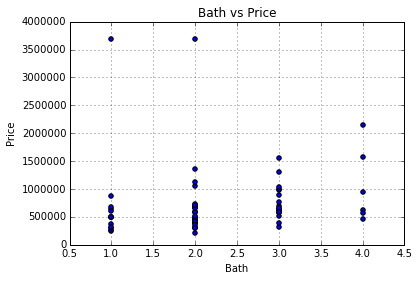

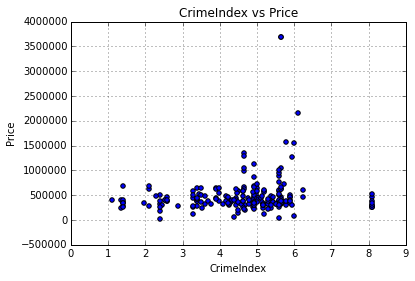

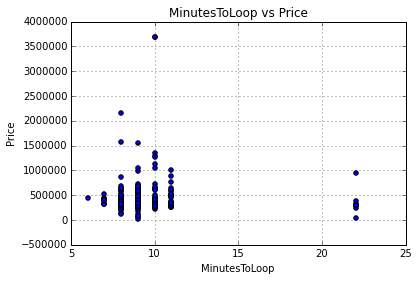

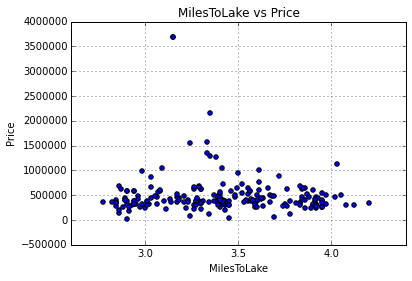

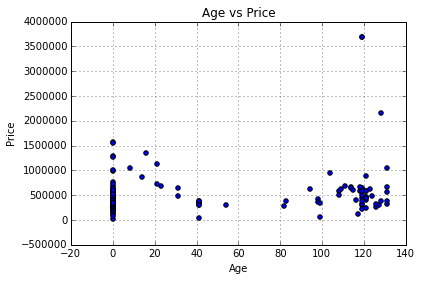

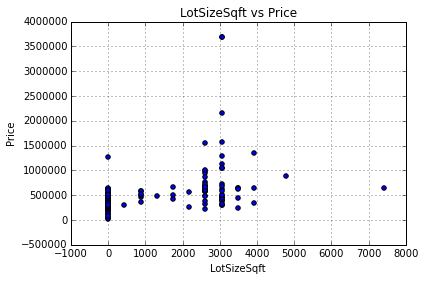

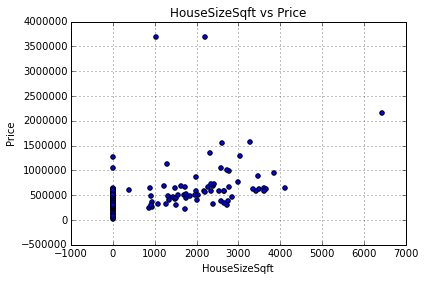

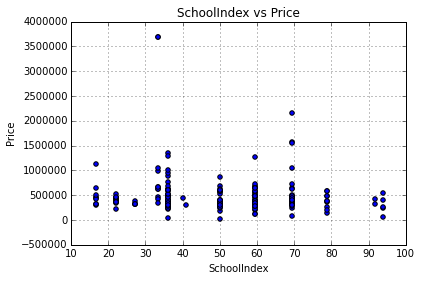

In [68]:
#Plot the data vs the price
for column in raw_data:
    if (np.dtype(raw_data[column]) != "object") & (column != "Price"):
        plt.scatter(raw_data[column], raw_data['Price'])
        plt.title(column + " vs Price")
        plt.ylabel("Price")
        plt.xlabel(column)
        plt.grid()
        plt.show()
        

//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


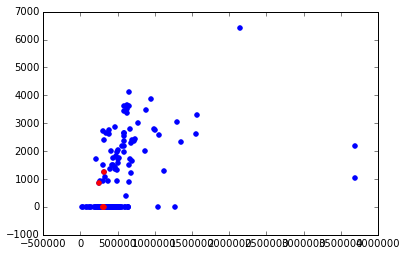

In [77]:
#We've determined that all the neighborhoods are same so it's not 
#necessary to use the neighborhood column in our analysis
houses_data = raw_data[raw_data.columns.drop('Neighborhood')]
#print(houses_data)


#This will separate all the address that are on Leavitt street
address = []
address = raw_data["Address"].values
guess = []

for line in address:
    guess.append("Leavitt" in line)
    
house_data_leavitt = houses_data[guess].copy()

plt.scatter(houses_data['Price'],houses_data["HouseSizeSqft"], color = "blue")
plt.scatter(house_data_leavitt['Price'],house_data_leavitt["HouseSizeSqft"], color = "red")

#This only leaves us with a few data points. Even though they are in a pretty similar price and housetype range,
#it would be better to have more information

#Alternatively, we can try the HouseType method
house_type = []
for house in houses_data["HouseType"]:
    if (house == "Condo"):
        house_type.append(1)
    else:
        house_type.append(0)
   
houses_data["IsCondo"] = house_type

                                    Address HouseType    Price  Bath  \
0         2111 W Division St #5, Chicago IL     Condo   390000   NaN   
1           1520 W Walton St #2, Chicago IL     Condo   320500   NaN   
3        1735 N Paulina St #314, Chicago IL     Condo   318000   NaN   
6            1440 N Wood St #2F, Chicago IL     Condo   242500   NaN   
7            1137 N Wood St #F2, Chicago IL     Condo   477500   NaN   
12       1449 N Ashland Ave #1R, Chicago IL     Condo   146500   NaN   
15        1332 N Wolcott Ave #1, Chicago IL     Condo   341000   NaN   
18          1019 N Honore St #1, Chicago IL     Condo   535000   NaN   
21     2300 W Wabansia Ave #124, Chicago IL     Condo   280000   NaN   
22      1026 N Hermitage Ave #2, Chicago IL       NaN   380000   NaN   
24     2089 W Wabansia Ave #307, Chicago IL     Condo   392500   NaN   
25          1637 W Beach Ave #1, Chicago IL     Condo   267500   NaN   
27         1111 N Hermitage Ave, Chicago IL     Condo   350000  

//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


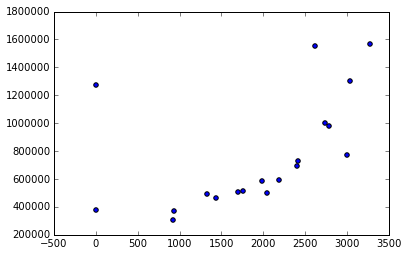

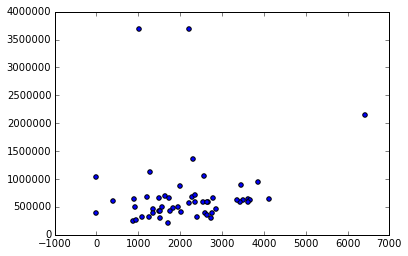

53     121
68       0
104      0
117      0
200    126
Name: Age, dtype: int64


In [83]:
#Now let's find out what kind of properties have NaN as the bathroom
test_houses = houses_data[np.isnan(houses_data["Bath"])].copy()
print(test_houses)
#From this we can again get confirmation that the condo price has little influence on the home prices. All the house types
#that have bathroom as NaN are either condos, empty lots, or the HouseType itself is NaN

#Remove condos for further analysis
houses_data_nc = houses_data[houses_data["IsCondo"] == 0]

#find out the distribution of the newly built houses 
new_houses = houses_data_nc[(houses_data_nc["Age"] == 0)].copy()
old_houses = houses_data_nc[(houses_data_nc["Age"] != 0)].copy()

plt.scatter(new_houses["HouseSizeSqft"],new_houses['Price'])
plt.show()
plt.scatter(old_houses["HouseSizeSqft"],old_houses["Price"])
plt.show()

print(house_data_leavitt['Age'])
#it looks like the newere houses definitely skew towards a higher price, whereas the older houses, with a few exceptions
#tend to stay in the same price range. As we are going for an older house, I believe this would justify a decision to 
#excluse newer houses in our prediction



In [126]:
rank_houses_price = houses_data.sort(["Price"], ascending = False)
rank_houses_sqft = houses_data.sort(["HouseSizeSqft"], ascending = False)

print(rank_houses_price,rank_houses_sqft)

# Remove the price outlier seen earlier
houses_data.drop(houses_data_nc[houses_data_nc['Price'] > 2000000].index, inplace=True)

houses_data['LogPrice'] = houses_data['Price'].apply(np.log)
print(houses_data.head())

#The first two data points appear to be describing the same unit. The have the same price and similar address, 
#so this might explain the high proce

                                    Address           HouseType    Price  \
128        1522 N Elk Grove Ave, Chicago IL  Single-Family Home  1570000   
130        1435 N Elk Grove Ave, Chicago IL  Single-Family Home  1550000   
135         1924 W Wabansia Ave, Chicago IL  Single-Family Home  1357000   
194       1732 N Winchester Ave, Chicago IL  Single-Family Home  1300000   
207            1251 N Honore St, Chicago IL            Lot/Land  1275000   
32              1357 N Bell Ave, Chicago IL  Single-Family Home  1125000   
31        1610 N Winchester Ave, Chicago IL  Single-Family Home  1050000   
215              1746 N Wood St, Chicago IL  Single-Family Home  1040000   
89            1756 N Wilmot Ave, Chicago IL  Single-Family Home  1000000   
20         1735 N Hermitage Ave, Chicago IL  Single-Family Home   982500   
84        2045 W Saint Paul Ave, Chicago IL  Single-Family Home   949000   
19              2152 W Caton St, Chicago IL  Single-Family Home   885000   
92          

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


ValueError: labels [39 76 77] not contained in axis

//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


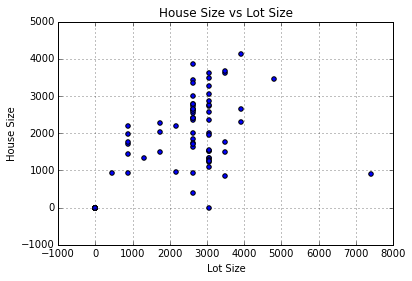

In [127]:
#Compare House Size with Lot Size
plt.scatter(houses_data["LotSizeSqft"],houses_data["HouseSizeSqft"])
plt.title("House Size vs Lot Size")
plt.ylabel("House Size")
plt.xlabel("Lot Size")
plt.grid()
plt.show()

#Most cases show the House Size is about equal or larger than the lot size. This just means the properties are multi-story

In [128]:
from sklearn import linear_model 
from sklearn.linear_model import RidgeCV

single_family_homes = houses_data[(houses_data["HouseType"] == "Single-Family Home")].copy()
print(len(single_family_homes))

columns_x = ['CrimeIndex','MinutesToLoop','MilesToLake','Age','LotSizeSqft','HouseSizeSqft','SchoolIndex']

train_x = single_family_homes[columns_x].values
train_y = single_family_homes["Price"].values

target_list = ['1342 N Leavitt St, Chicago IL', 'Wicker Park', 'Single-Family Home', 
               0, 2, 3.76, 0, 0, 116, 3049, 3154, 16.7]
target = pd.Series(data=target_list, index=raw_data.columns)
target = target.drop('Neighborhood')

target_x = target[columns_x].values
print(target_x)
print(train_x[0])

#X_nearest = 200
ridgelm = RidgeCV()
ridgelm.fit(train_x,train_y)

print('PREDICTED PRICE: ', np.mean(ridgelm.predict(target_x)))
#print('PREDICTED PRICE OF NEAREST NEIGHBOR: ', np.exp(ridgelm.predict(X_nearest)))

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train_x, train_y)
print(regr.predict(target_x))
print(regr.score(train_x,train_y))


30
[3.76 0 0 116 3049 3154 16.7]
[  1.40000000e+00   8.00000000e+00   2.86000000e+00   2.30000000e+01
   2.61400000e+03   1.62800000e+03   5.00000000e+01]
PREDICTED PRICE:  924036.951206
[ 1307132.40815201]
0.592174965166


//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
